## Midterm - Jenny Skytta

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [7]:
# read in the file
dermatology = pd.read_csv('/Users/jennyskytta/Downloads/dermatology.csv', sep="\t")
dermatology.sample(30)

,Erythema,Scathing,Definite Borders,Itching,Koebner,Polygonal,Follicular,Oral,Knee,Scalp,...,Disapperance,Vacuolisation,Spongiosis,Retes,Follicular.1,Perifollicular,Inflamatory,Band-like,Age,Disease
134,3,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,34,5
179,2,2,2,2,0,2,0,3,0,0,...,0,3,3,3,0,0,2,2,36,3
206,2,3,2,0,1,0,0,0,2,3,...,0,0,0,0,0,0,1,0,20,1
244,2,1,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,2,0,33,1
128,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,17,5
171,2,3,2,0,0,0,0,0,2,2,...,2,0,0,0,0,0,2,0,55,1
349,2,2,1,0,0,0,2,0,2,0,...,0,0,3,0,2,2,2,0,7,6
126,2,2,2,0,0,0,2,0,2,0,...,0,0,0,0,2,2,2,0,8,6
291,2,2,2,0,1,0,0,0,1,1,...,1,0,0,0,0,0,2,0,42,1
45,2,1,1,1,1,2,0,1,0,0,...,0,2,0,2,0,0,3,3,48,3


<hr>
After encountering several errors with the dataset, I worked towards cleaning it up a bit.  I converted the Age column from object, renamed columns, and removed the errant ? in the Age column. 
<hr>

In [8]:
dermatology.replace({'Age': {'?': np.nan}}, regex=False,inplace=True)

In [9]:
dermatology.rename(columns = {'Definite Borders':'Def_Bor', 'Family Hostory':'Fam_Hist', 'Follicular.1':'FolliOne'}, inplace = True)

In [10]:
dermatology = dermatology.apply(pd.to_numeric,errors='ignore')

In [11]:
dermatology['Age'] = dermatology['Age'].fillna(0)

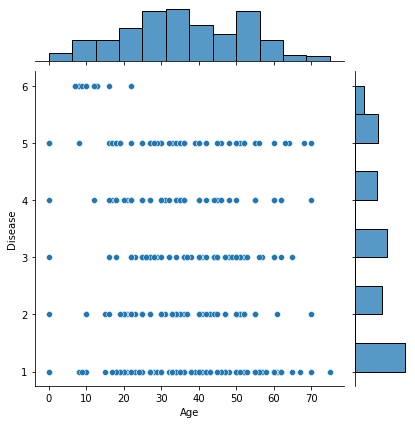

In [12]:
sns.jointplot(x ='Age', y ='Disease', data = dermatology)  # the data is a bit lopsided by Disease

## Gradient descent (GD) 
<b>model 1</b>
- Let’s try determining the type of disease based on the patient’s Age. Use gradient descent (GD) to build your regression model (model1). Start by writing the GD algorithm and then implement it using a programming language of your choice. [10 points]

In [13]:
from sklearn.linear_model import LogisticRegression 

Xt, Xv, yt, yv = train_test_split(dermatology.Age, dermatology.Disease, test_size=0.4, random_state=101)

In [14]:
LR = LogisticRegression(max_iter=1000)
LR.fit(Xt.array.reshape(-1, 1), yt) 

LogisticRegression(max_iter=1000)

In [15]:
# print the intercept and coefficients
print(LR.coef_) # each disease has its own coefficient

[[ 0.03703859]
 [ 0.01732799]
 [ 0.0478091 ]
 [ 0.02226193]
 [ 0.03031326]
 [-0.15475088]]


In [114]:
print(LR.intercept_) # each disease has its own intercept

[-1.24015551e-01  2.39104466e-03 -9.83813129e-01 -6.66435433e-01
 -6.25436837e-01  2.39730990e+00]


In [16]:
# y = m(Age) + Intercept 
0.03703859*42 + -1.24015551e-01 

1.431605229

In [17]:
# calculate SSE Sum of Square Error
# SSE(m,c)= E(yi-yhat)^2
# predicted = slope * distince + intercept (m*R + c)
m0 = 1 # value for slope
c0 = 0 # value for intercept
vhat = m0*dermatology.Age + c0
np.sum((dermatology.Disease - vhat)**2)

def sse(theta):
    m = theta[0]
    c = theta[1]
    vhat = m*dermatology.Age + c
    sse = np.sum((dermatology.Disease - vhat)**2)
    return sse
sse(np.array([1,0]))  # we get the same value using this method

491398.0

In [18]:
# define SSE
# we see the output is the same as our previous SSE line above
#.values makes this into matrix 
#.sum tells us we have two columns
# vector contains two variables: slope and intercept
def grad(theta):
    m = theta[0]
    c = theta[1]
    vhat = m*dermatology.Age + c  # predicted velocity 
    e = dermatology.Disease - vhat  #error equals..
    grad = -2*pd.concat((e*dermatology.Age, e), axis=1).values.sum(axis=0) # gradient formula 
    return grad

grad(np.array([1,0]))  # we end with our slope and intercept 

array([1043060.,   23936.])

In [19]:
alpha = 0.00000001
theta = np.array([1,0])  # this is our initial parameter containing our slope and intercept

for i in range(25):
    print("theta:", theta, "sse = %6.4f" % sse(theta))
    theta = theta - alpha*grad(theta)
print("final", theta)

theta: [1 0] sse = 491398.0000
theta: [ 9.895694e-01 -2.393600e-04] sse = 480573.0276
theta: [ 9.79254740e-01 -4.76007544e-04] sse = 469987.3673
theta: [ 9.69054731e-01 -7.09972781e-04] sse = 459635.7284
theta: [ 9.58968099e-01 -9.41285527e-04] sse = 449512.9374
theta: [ 0.94899358 -0.00116998] sse = 439613.9349
theta: [ 0.93912994 -0.00139607] sse = 429933.7737
theta: [ 0.92937593 -0.0016196 ] sse = 420467.6156
theta: [ 0.91973034 -0.0018406 ] sse = 411210.7298
theta: [ 0.91019197 -0.00205908] sse = 402158.4896
theta: [ 0.90075962 -0.00227509] sse = 393306.3709
theta: [ 0.89143211 -0.00248864] sse = 384649.9495
theta: [ 0.88220828 -0.00269977] sse = 376184.8992
theta: [ 0.87308698 -0.0029085 ] sse = 367906.9890
theta: [ 0.86406706 -0.00311485] sse = 359812.0820
theta: [ 0.8551474  -0.00331886] sse = 351896.1323
theta: [ 0.84632689 -0.00352056] sse = 344155.1837
theta: [ 0.83760442 -0.00371995] sse = 336585.3673
theta: [ 0.82897891 -0.00391708] sse = 329182.8998
theta: [ 0.82044927 -0.

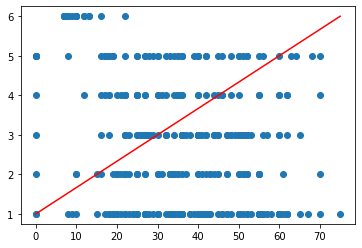

In [20]:
Y_pred = 0.77122595*dermatology.Age + -0.00523556

plt.scatter(dermatology.Age, dermatology.Disease) 
plt.plot([min(dermatology.Age), max(dermatology.Age)], [min(dermatology.Disease), max(dermatology.Disease)], color='red')  # regression line
plt.show()

In [120]:
Y_pred = 0.77122595*42 + -0.00523556
Y_pred

32.38625434

<hr>
In reviewing the y predicted, we can see that the relationship between dermatological disease and age is present. The model predicts development of <b>Lichen planus</b> at approximately age <b>32</b> .  
<hr>

_The diseases in this group are 1: psoriasis, 2: seboreic dermatitis, 3: lichen planus, 4: pityriasis rosea, 5: cronic dermatitis, and 6: pityriasis rubra pilaris_

## Random Forest
<b> model 2</b>
- Use random forest on the clinical as well as histopathological attributes to classify the disease type (model2). [5 points]



In [22]:
from sklearn.model_selection import train_test_split
X = dermatology.iloc[:,1:34]
y = dermatology['Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)

In [24]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [25]:
predictions = rfc.predict(X_test)

In [125]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        30
           2       0.86      1.00      0.93        19
           3       1.00      1.00      1.00        22
           4       1.00      0.84      0.91        19
           5       1.00      1.00      1.00        17
           6       1.00      0.67      0.80         3

    accuracy                           0.96       110
   macro avg       0.97      0.92      0.94       110
weighted avg       0.97      0.96      0.96       110



In [126]:
print(confusion_matrix(y_test,predictions))

[[30  0  0  0  0  0]
 [ 0 19  0  0  0  0]
 [ 0  0 22  0  0  0]
 [ 0  3  0 16  0  0]
 [ 0  0  0  0 17  0]
 [ 1  0  0  0  0  2]]


In [127]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.1
Mean Squared Error: 0.33636363636363636
Root Mean Squared Error: 0.5799686511904211


<hr>
Using the Random Forest method, we can see that using these Histopathological Attributes and Clinical Attributes (X) are effective at predicting disease outcomes with a high accureacy of 96% from our f1 scores.  We can also see that as indicated in our plots from the first portion of the assignment, the support for Pityriasis Rubra Pilaris  could indicate structural weakness for this Disease class or its a rare disease. The RMSE is still within acceptable limits for the model. <br>

Our model predicts the rates of disease in descending from greatest prevelance to lease as:
- Psoriasis
- Lichen planus
- Seboreic Dermatitis
- pityriasis rosea
- Cronic dermatitis
- Pityriasis Rubra pilaris
<hr>

_The diseases in this group are 1: psoriasis, 2: seboreic dermatitis, 3: lichen planus, 4: pityriasis rosea, 5: cronic dermatitis, and 6: pityriasis rubra pilaris_

## kNN
<b>model 3</b>
- Use kNN on the clinical attributes and histopathological attributes to classify the disease type and report your accuracy (model3). [5 points]



In [128]:
from sklearn.neighbors import KNeighborsClassifier 

In [129]:
X = dermatology.iloc[:,1:34]
y = dermatology['Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [130]:
m = KNeighborsClassifier(1)
m.fit(X_train, y_train)  
m.score(X_test, y_test)

0.9363636363636364

In [131]:
pred = m.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       0.89      0.89      0.89        19
           3       1.00      1.00      1.00        22
           4       0.81      0.89      0.85        19
           5       1.00      0.82      0.90        17
           6       0.75      1.00      0.86         3

    accuracy                           0.94       110
   macro avg       0.91      0.94      0.92       110
weighted avg       0.94      0.94      0.94       110



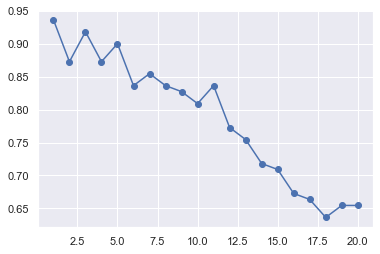

In [132]:
accuracies = []
for k in range(1,21):
    m = KNeighborsClassifier(k)
    m.fit(X_train, y_train)
    accuracies.append(m.score(X_test, y_test))

_ = plt.plot(range(1,21), accuracies, marker="o")

With this model, accuracy decreases as we increase the size of our K.  

In [133]:
m = KNeighborsClassifier(5)
m.fit(X_train, y_train)  # fit is the same thing as "train"  - we used everything for training so everything is trained 
m.score(X_test, y_test)

0.9

In [134]:
pred = m.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        30
           2       0.76      0.84      0.80        19
           3       1.00      1.00      1.00        22
           4       0.82      0.74      0.78        19
           5       1.00      0.82      0.90        17
           6       0.60      1.00      0.75         3

    accuracy                           0.90       110
   macro avg       0.86      0.90      0.87       110
weighted avg       0.91      0.90      0.90       110



In [135]:
print(confusion_matrix(y_test,pred))

[[30  0  0  0  0  0]
 [ 1 16  0  1  0  1]
 [ 0  0 22  0  0  0]
 [ 0  5  0 14  0  0]
 [ 0  0  0  2 14  1]
 [ 0  0  0  0  0  3]]


<hr> Using the kNN method, we can see that with tighter neighbors, we have better accuracy which is fairly intuitive.  Lichen planus and cronic dermatitis have the most precision.  Again, we can infer that Pityriasis rubra pilaris may be a rare disease as we only have 3 instances to classify here.  
<br>

Our kNN model predicts the rates of disease in descending from greatest prevelance to lease as:
- Psoriasis
- Lichen planus
- Seboreic Dermatitis
- pityriasis rosea & Cronic dermatitis (tied)
- Pityriasis Rubra pilaris
<hr>

_The diseases in this group are 1: psoriasis, 2: seboreic dermatitis, 3: lichen planus, 4: pityriasis rosea, 5: cronic dermatitis, and 6: pityriasis rubra pilaris_

# Clustering
<b>model 4</b>
- Finally, use two different clustering algorithms and see how well these attributes can determine the disease type (model4 and model5). [10 points]


In [26]:
from sklearn.cluster import KMeans

X = dermatology.iloc[:,1:34]
y = dermatology['Disease']

clus = KMeans(n_clusters=3)
_ = clus.fit(X) 

In [27]:
kmhat = clus.predict(X)

In [30]:
clus.inertia_   # overall loss  variation within the clusters 

9810.340834551022

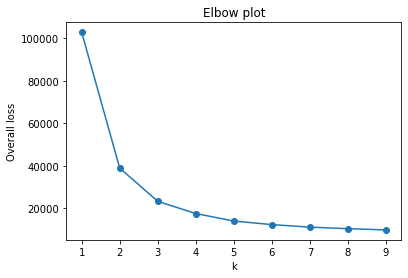

In [31]:
ks = range(1, 10)
losses = []
for k in ks:
    clus = KMeans(k)
    _ = clus.fit(X)
    losses.append(clus.inertia_)
_ = plt.plot(ks, losses, marker="o")
plt.xlabel("k")
_ = plt.ylabel("Overall loss")
_ = plt.title("Elbow plot")  # best k was 3 which is what I chose 

In [140]:
pd.crosstab(kmhat, y)

Disease,1,2,3,4,5,6
row_0,,,,,,
0,22,16,7,12,15,20
1,47,27,34,24,22,0
2,43,18,31,13,15,0


<br><br>
I selected a random k (3) and after plotting my SSE curve (elbow plot), it appears that 3 was a good k selection.  In reviewing the outputs, we see the below:<br><hr>

Our Cluster model contains the diseases with largest concentrations as follows:
- Cluster 1: __ALL Diseases__ and the only to contain Pityriasis Rubra Pilaris
- Cluster 2: Psoriasis, Lichen planus, seboreic dermatitis,  pityriasis rosea, cronic dermatitis
- Cluster 3: Psoriasis, Lichen planus, seboreic dermatitis, cronic dermatitis, pityriasis rosea

<hr>

_The diseases in this group are 1: psoriasis, 2: seboreic dermatitis, 3: lichen planus, 4: pityriasis rosea, 5: cronic dermatitis, and 6: pityriasis rubra pilaris_

In [141]:
from sklearn.cluster import AgglomerativeClustering

# this doesn't NEED a numbered cluster BUT its hard to predict with out a number
alg = AgglomerativeClustering(3)
achat = alg.fit_predict(X)  # AC hat 

# Clustering
<b>model 5</b>

In [142]:
pd.crosstab(achat, y)  

Disease,1,2,3,4,5,6
row_0,,,,,,
0,38,27,23,23,23,20
1,43,13,26,8,13,0
2,31,21,23,18,16,0


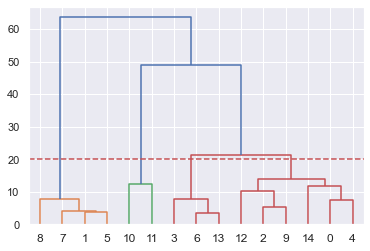

In [143]:
import scipy.cluster.hierarchy as sch

_ = sch.dendrogram((sch.linkage(X.sample(15), method="ward")))  # sample of 15 for our 3 clusters 
plt.axhline(y=20, color='r', linestyle='--')

In [144]:
dermatology.groupby(achat)[['Erythema', 'Scathing', 'Def_Bor', 'Itching', 'Koebner ',
       'Polygonal', 'Follicular', 'Oral', 'Knee', 'Scalp', 'Fam_Hist',
       'Melanin', 'Eosinophils', 'PNL', 'Fibrosis', 'Exocytosis',
       'Acanothosis', 'Hyperkeratosis', 'Parakeratosis', 'Clubbing',
       'Elongation', 'Thinning', 'Spongiform', 'Munro', 'Focal',
       'Disapperance', 'Vacuolisation', 'Spongiosis', 'Retes', 'FolliOne',
       'Perifollicular', 'Inflamatory', 'Band-like', 'Age']].mean()

,Erythema,Scathing,Def_Bor,Itching,Koebner,Polygonal,Follicular,Oral,Knee,Scalp,...,Focal,Disapperance,Vacuolisation,Spongiosis,Retes,FolliOne,Perifollicular,Inflamatory,Band-like,Age
0,2.038961,1.766234,1.383117,1.396104,0.577922,0.357143,0.337662,0.246753,0.662338,0.435065,...,0.292208,0.305195,0.324675,1.032468,0.337662,0.227273,0.266234,1.805195,0.435065,20.181818
1,2.058252,1.728155,1.689320,1.368932,0.621359,0.514563,0.038835,0.446602,0.631068,0.621359,...,0.485437,0.611650,0.601942,0.689320,0.563107,0.009709,0.000000,1.902913,0.708738,55.165049
2,2.119266,1.899083,1.651376,1.321101,0.724771,0.513761,0.045872,0.495413,0.532110,0.541284,...,0.449541,0.550459,0.504587,1.091743,0.513761,0.018349,0.009174,1.917431,0.577982,38.568807


<hr>
We can tell from this that cluster 1(0) contains almost equal distributions of the 6 Diseases, these people are younger with an average of 20, more spongiosis and Follicular.1.  Cluster 2(1) is predominantly Psoriasis and Lichen planus older aged adults (55), with no Perifollicular. Cluster 3(2) is adults approaching age 40 (38) also mostly Disease 1 but different from cluster 2 in that they have Perifollicular, albeit at low rates as well as more Spongiosis.  Overall the clusters do appear to be grouping well but attributes are somewhat well distributed.  You do see that Disease 1 is the most common diagnosis. 

Our Cluster model contains the diseases with largest concentrations as follows:
- Cluster 1: __ALL Diseases__ and only cluster containing pityriasis rubra pilaris
- Cluster 2: Psoriasis, Lichen planus, seboreic dermatitis, cronic dermatitis, pityriasis rosea
- Cluster 3: Psoriasis, Lichen planus, seboreic dermatitis, pityriasis rosea, cronic dermatitis
<hr>

_The diseases in this group are 1: psoriasis, 2: seboreic dermatitis, 3: lichen planus, 4: pityriasis rosea, 5: cronic dermatitis, and 6: pityriasis rubra pilaris_

# Problem 2:
- hate crimes that happened within 10 days of 2016 US elections
- 900 hate incidents were reported to the Southern Poverty Law Center, averaging out to 90 per day
- 36,000 hate crimes were reported to the FBI from 2010 through 2015 — an average of 16 per day.
<hr>

Look for trends within the numbers, such as how hate crimes vary by state, as well as what factors within those states might be tied to hate crime rates.

In [197]:
# read in the file
HC = pd.read_csv('/Users/jennyskytta/Downloads/hatecrime.csv')
HC.sample(2)

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
41,South Dakota,53053,0.035,0.51,0.899,NaN,0.08,0.442,0.17,0.62,NaN,3.301737
31,New Mexico,46686,0.068,0.69,0.828,0.06,0.10,0.464,0.62,0.40,0.294811,1.886435


In [198]:
HC.shape

(51, 12)

In [199]:
HC = HC.replace(np.nan, 0)

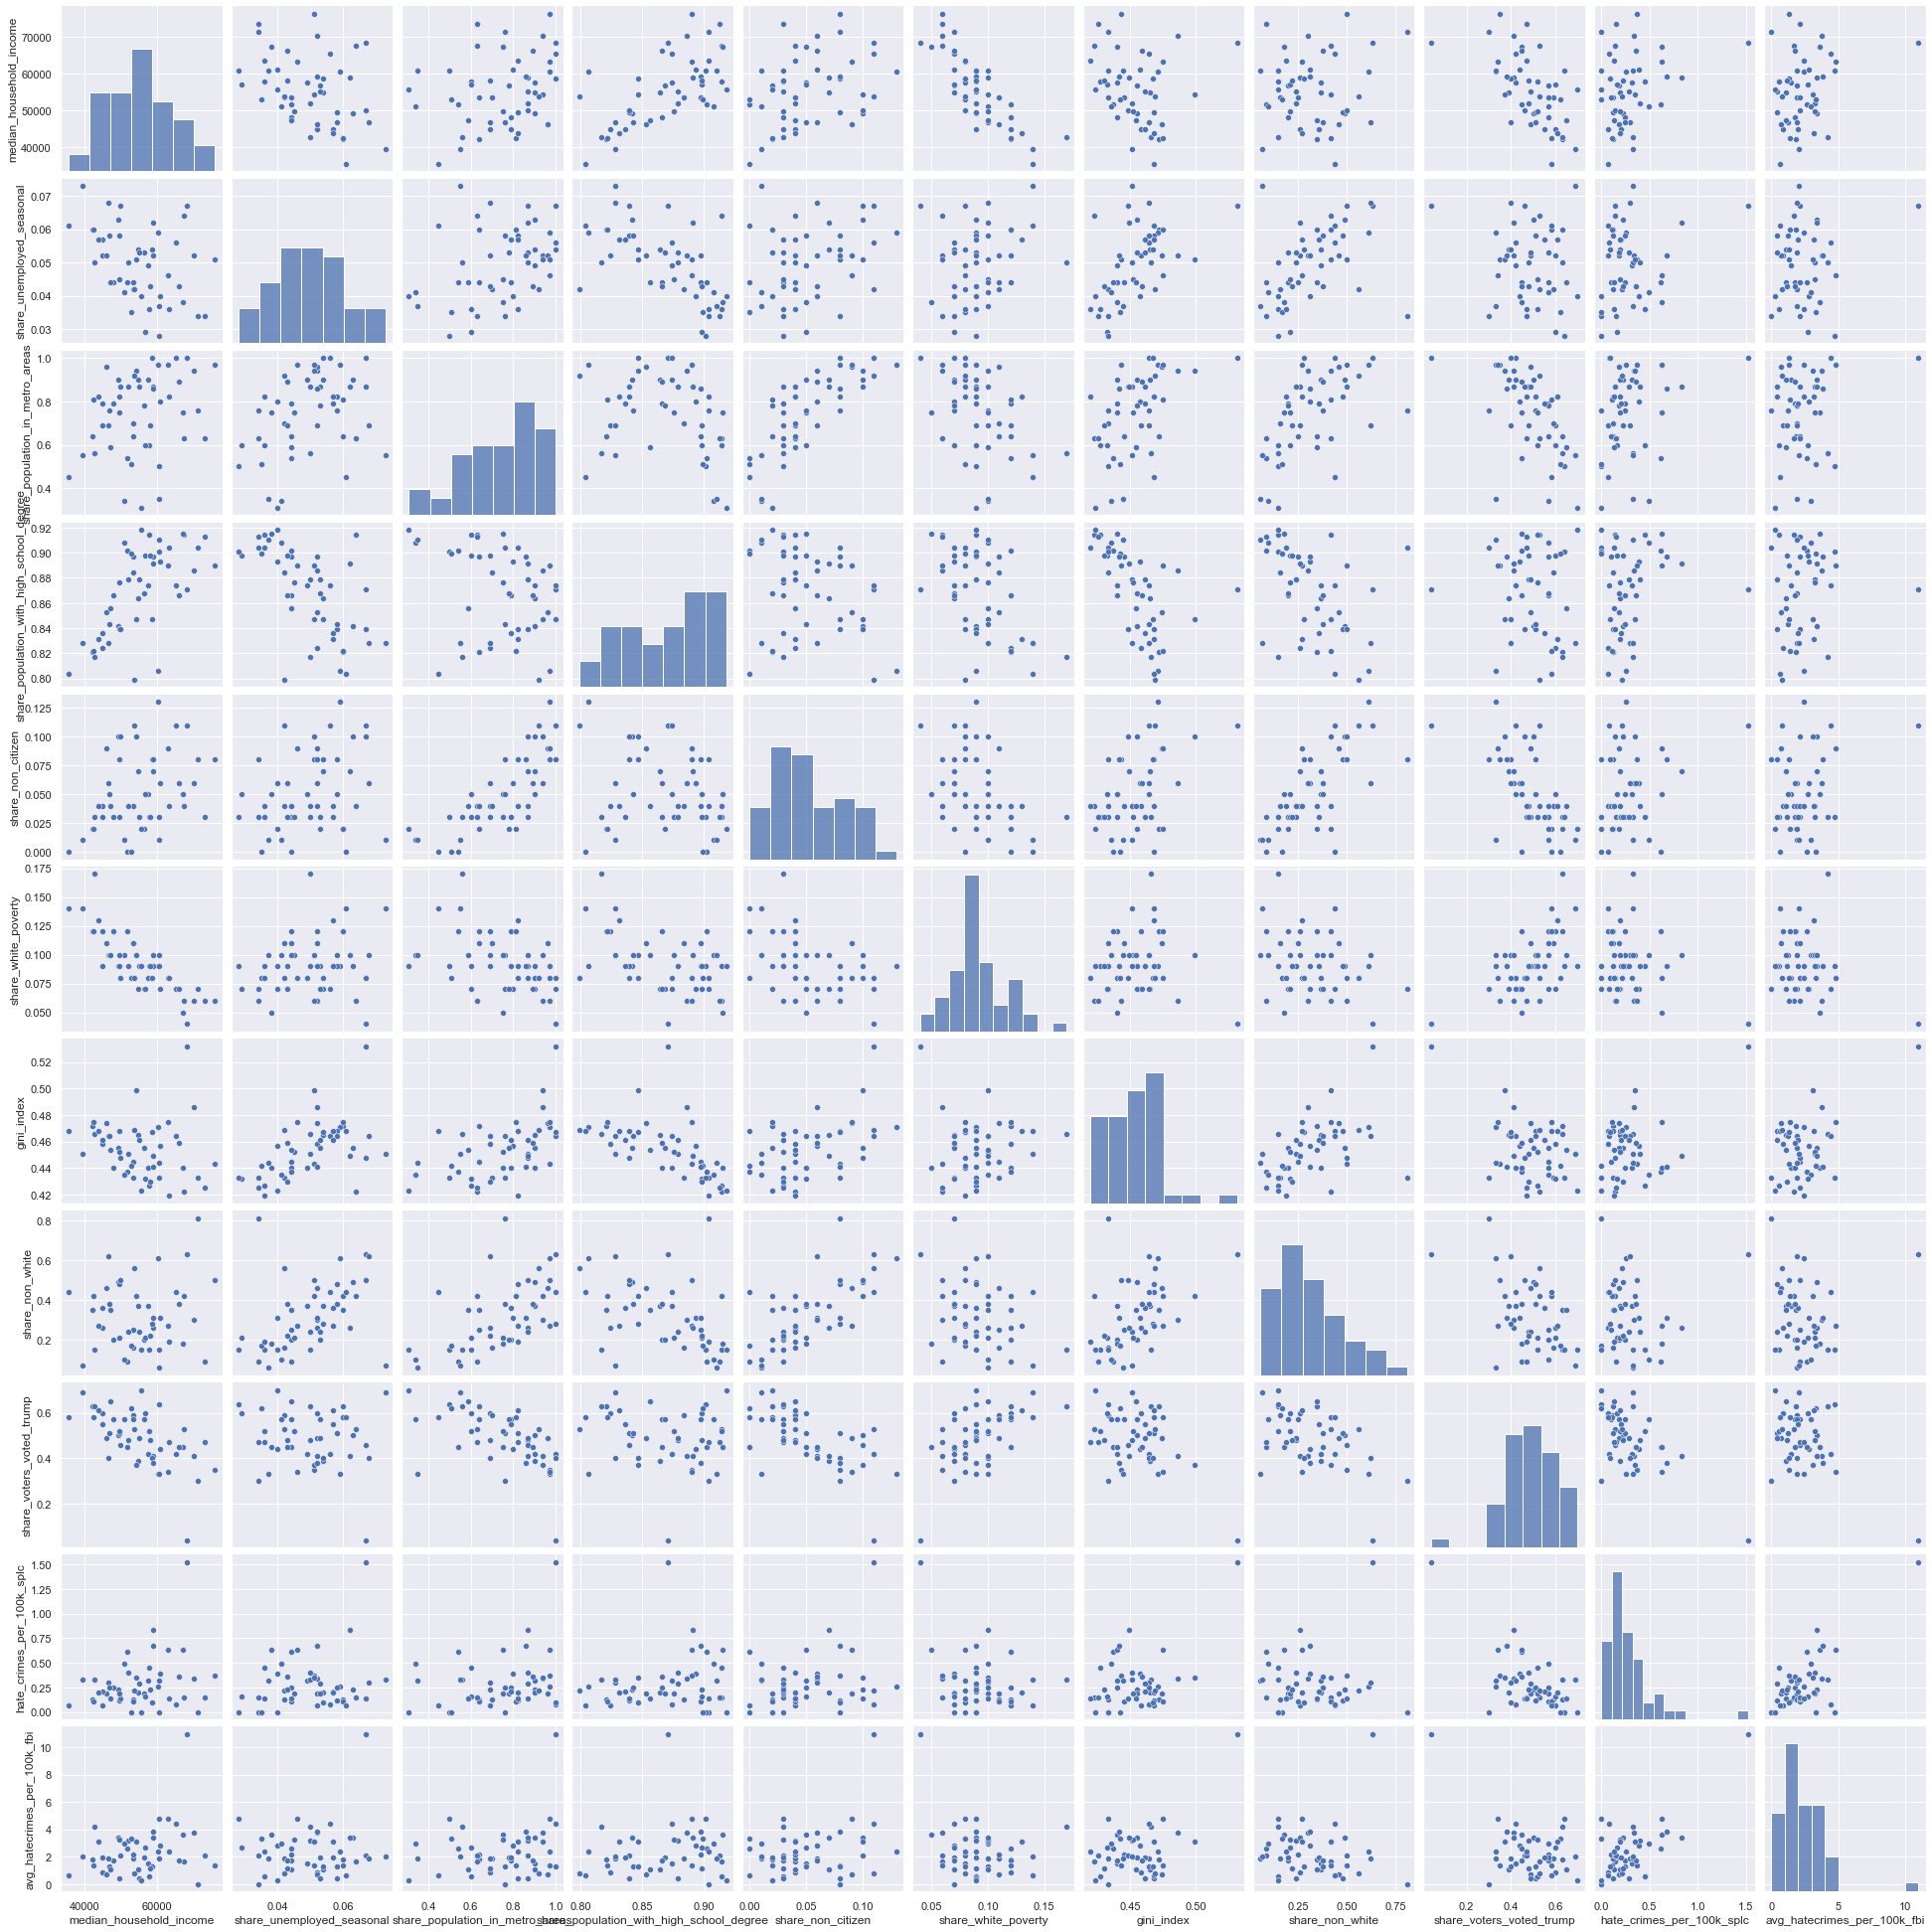

In [151]:
sns.pairplot(HC)

### Question 1:
__Use this data to answer the following questions. 
Use appropriate machine learning techniques/algorithms__

Note: For the first two questions: Choose the variables which you think are related to the predictors (income inequality, race and nature of the population) to build your model. Justify your selection.
Refine your model iteratively.

[Hint: You can use gradient descent, or/and add/remove variables in an incremental fashion].

- 1) How does income inequality relate to the number of hate crimes and hate incidents? [5 points]

In [200]:
# income inequality = median_household_income, share_unemployed_seasonal, share_white_poverty
# race = share_non_white, share_non_citizen
# nature of the population = share_voters_voted_trump

X = HC[['median_household_income','share_unemployed_seasonal','share_white_poverty']]
y = HC['hate_crimes_per_100k_splc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

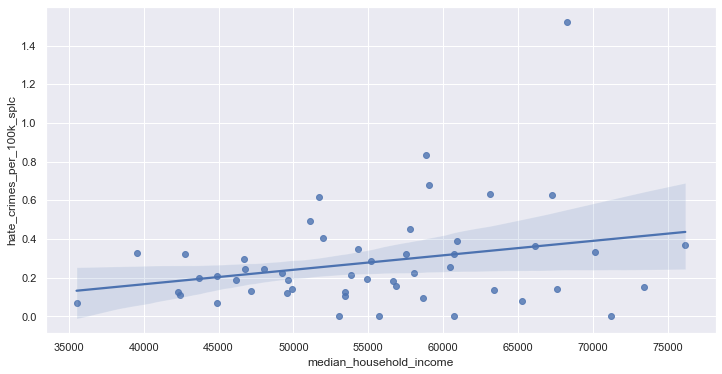

In [201]:
sns.regplot(x="median_household_income", y="hate_crimes_per_100k_splc", data=HC);

In [202]:
from sklearn.linear_model import LinearRegression
m = LinearRegression()
m.fit(X_train,y_train)  # train the model
print(m.intercept_) # print the intercept

-0.8110584136911091


In [203]:
coeff_df = pd.DataFrame(m.coef_,X.columns,columns=['Coefficient'])  # creating a DF off of these 
coeff_df  # relates to each features of our dataset 

,Coefficient
median_household_income,0.000011
share_unemployed_seasonal,9.668171
share_white_poverty,-0.202787


In [204]:
predictions = m.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.1730465658532989
MSE: 0.04955315705112517
RMSE: 0.22260538414675682


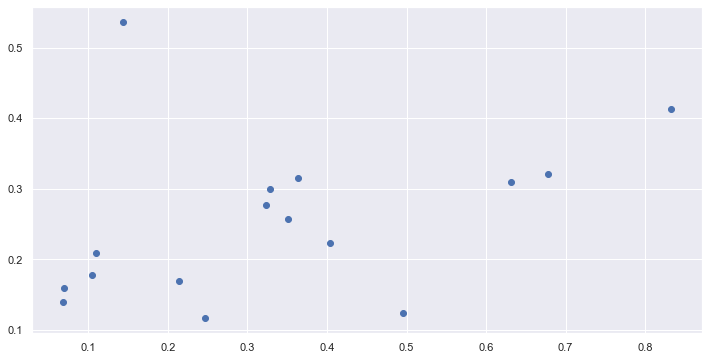

In [205]:
plt.scatter(y_test,predictions) # there does appear to be a linear relationship 

<hr>
There does appear to be a linear relationship between my paramaters and hate crimes from SPLC.  I initially decided to use the features of 'median household income', 'share unemployed seasonal', and 'share white poverty' as those all seemed to directly addressed low SES scenarios. The root mean square error, which is a metric that tells us the average distance between my predicted values from my model and the actual values in the HC dataset shows that there is predictive power with these parameters.  We can see there is an inverse relationship with shared white poverty and hate crimes.<br><hr>

- Holding all other features fixed, a 1 unit increase in **Median Household Income** is associated with an increase of  0.000011 unit increase in SPLC reported Hate crimes. This appears to be a miniscule relationship. <br>

- Holding all other features fixed, a 1 unit increase in **Shared Seasonal Unemployment** is associated with a **10 unit increase** in SPLC reported Hate crimes which seems pretty strong.

- Holding all other features fixed, a 1 unit increase in **Shared white poverty** is associated with a **2 unit  decrease** in SPLC reported Hate crimes.

<AxesSubplot:xlabel='share_unemployed_seasonal', ylabel='hate_crimes_per_100k_splc'>

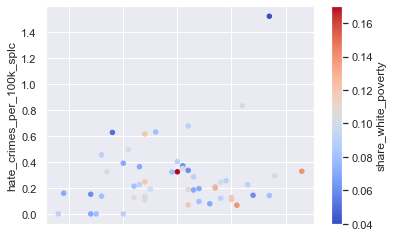

In [158]:
HC.plot.scatter(x='share_unemployed_seasonal',y='hate_crimes_per_100k_splc',c='share_white_poverty',cmap='coolwarm')

In [206]:
# income inequality = median_household_income, share_unemployed_seasonal, share_white_poverty
# race = share_non_white, share_non_citizen
# nature of the population = share_voters_voted_trump

X = HC[['share_unemployed_seasonal','share_white_poverty']]
y = HC['hate_crimes_per_100k_splc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
m.fit(X_train,y_train) 
print(m.intercept_) # print the intercept

0.19491236020313857


In [207]:
coeff_df = pd.DataFrame(m.coef_,X.columns,columns=['Coefficient'])  # creating a DF off of these 
coeff_df  # relates to each features of our dataset 

,Coefficient
share_unemployed_seasonal,7.036039
share_white_poverty,-3.185084


In [208]:
pred1 = m.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.1730465658532989
MSE: 0.04955315705112517
RMSE: 0.22260538414675682


Text(0.5, 1.0, 'Predictive model')

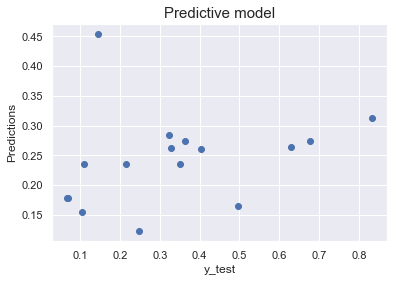

In [162]:
plt.scatter(y_test,pred1) # there does appear to be a linear relationship 
plt.xlabel("y_test")
plt.ylabel("Predictions")
plt.title("Predictive model",fontsize=15)

Text(0.5, 1.0, 'Share seasonal Unemployment effect on Hate Crimes')

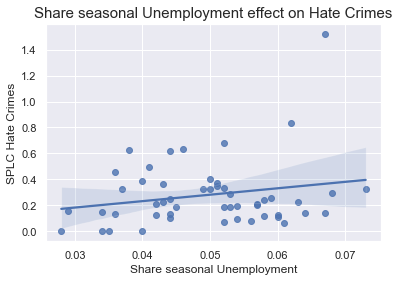

In [163]:
sns.regplot(x="share_unemployed_seasonal", y="hate_crimes_per_100k_splc", data=HC);
plt.xlabel("Share seasonal Unemployment")
plt.ylabel("SPLC Hate Crimes")
plt.title("Share seasonal Unemployment effect on Hate Crimes",fontsize=15)

Text(0.5, 1.0, 'Shared white poverty effect on Hate Crimes')

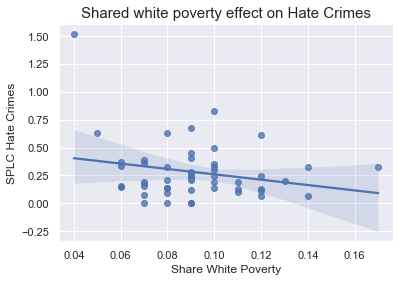

In [164]:
sns.regplot(x="share_white_poverty", y="hate_crimes_per_100k_splc", data=HC);
plt.xlabel("Share White Poverty")
plt.ylabel("SPLC Hate Crimes")
plt.title("Shared white poverty effect on Hate Crimes",fontsize=15)

In [209]:
# income inequality = median_household_income, share_unemployed_seasonal, share_white_poverty
# race = share_non_white, share_non_citizen
# nature of the population = share_voters_voted_trump

X = HC[['share_unemployed_seasonal','median_household_income']]
y = HC['hate_crimes_per_100k_splc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
m.fit(X_train,y_train) 
print(m.intercept_) # print the intercept

-0.8590903679363256


In [210]:
coeff_df = pd.DataFrame(m.coef_,X.columns,columns=['Coefficient'])  # creating a DF off of these 
coeff_df  # relates to each features of our dataset 

,Coefficient
share_unemployed_seasonal,9.760299
median_household_income,0.000011


In [211]:
pred2 = m.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.1730465658532989
MSE: 0.04955315705112517
RMSE: 0.22260538414675682


Text(0.5, 1.0, 'Predictive model')

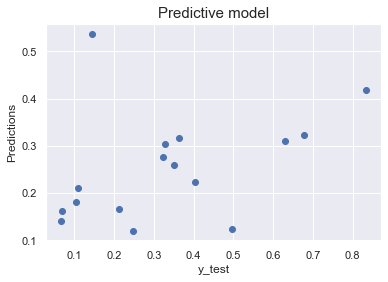

In [168]:
plt.scatter(y_test,pred2) # there does appear to be a linear relationship 
plt.xlabel("y_test")
plt.ylabel("Predictions")
plt.title("Predictive model",fontsize=15)

<hr>
After changing my parameters just a bit, the predictive value didn't really change much at all.  We still essentially have an RMSE of .2 which is decently predictive of a linear relationship between my the variables of  Shared seasonal unemployment ,'Median household income' and instances of SPLC reported Hate Crimes.<br><hr>

- Holding all other features fixed, a 1 unit (100K) increase in **Median Household Income** is associated with an increase of  0.000011 unit increase in SPLC reported Hate crimes. This appears to be a miniscule relationship. <br>

- Holding all other features fixed, a 1 unit (100K) increase in **Shared Seasonal Unemployment** is associated with a **8 unit increase** in SPLC reported Hate crimes which seems pretty strong.

### Question 2:

- 2) How can we predict the number of hate crimes and hate incidents from race/nature of the population? [5 points]
<br><hr>

_Note: For the first two questions: Choose the variables which you think are related to the predictors (income inequality, race and nature of the population) to build your model. Justify your selection.
Refine your model iteratively._


<AxesSubplot:>

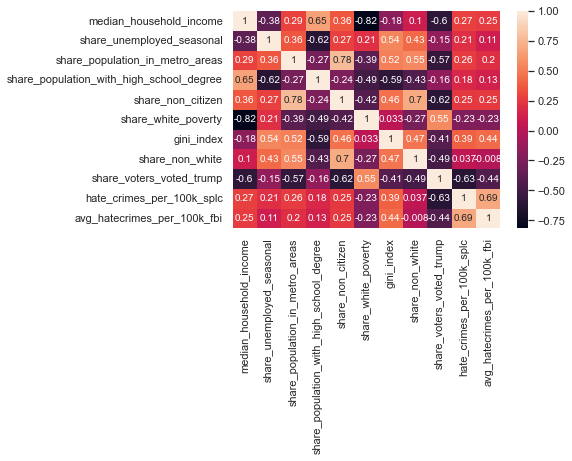

In [169]:
sns.heatmap(HC.corr(),annot=True) 

- race = share_non_white, share_non_citizen
- nature of the population = share_voters_voted_trump

In [212]:
X = HC[['share_non_white','share_non_citizen','share_voters_voted_trump']]
y = HC['hate_crimes_per_100k_splc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
m.fit(X_train,y_train) 
print(m.intercept_) # print the intercept

1.2450163503510296


In [213]:
coeff_df = pd.DataFrame(m.coef_,X.columns,columns=['Coefficient'])  # creating a DF off of these 
coeff_df  # relates to each features of our dataset 

,Coefficient
share_non_white,-0.307269
share_non_citizen,-0.997268
share_voters_voted_trump,-1.737574


In [214]:
pred3 = m.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.1730465658532989
MSE: 0.04955315705112517
RMSE: 0.22260538414675682


Text(0.5, 1.0, 'Predictive model')

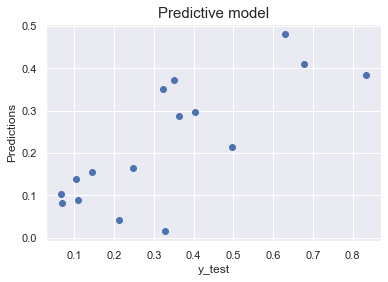

In [173]:
plt.scatter(y_test,pred3) 
plt.xlabel("y_test")
plt.ylabel("Predictions")
plt.title("Predictive model",fontsize=15)

Text(0.5, 1.0, 'Trump Voters and Hate Crimes')

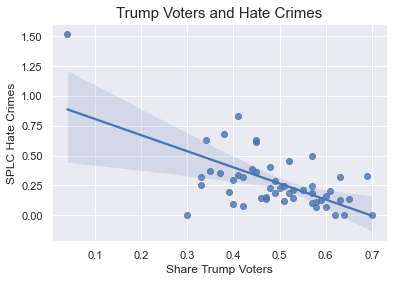

In [174]:
sns.regplot(x="share_voters_voted_trump", y="hate_crimes_per_100k_splc", data=HC);
plt.xlabel("Share Trump Voters")
plt.ylabel("SPLC Hate Crimes")
plt.title("Trump Voters and Hate Crimes",fontsize=15)

In looking at the variables of Shared non-white, Shared-non citizen and Shared Trump voters, we see a strong predictive inverse linear relationship. This may indicate that there is a decrease in reported hate crimes where there is a population primarily representing Trump voters (i.e. Caucasian).  In areas where there are less Trump voters, we may expect an increase.  To look at this, it could be helpful to look at the variable of share_population_in_metro_areas and hate crimes to see if the liklihood of reported hate crimes increases.  We could also then quickly view a plot look at the relationship between metro areas and Trump voters to see if the expected disparity <br><hr>

- Holding all other features fixed, a 1 unit (100K) increase in **Shared non white** is associated with a **-0.307269 unit decrease** in SPLC reported Hate crimes.<br>

- Holding all other features fixed, a 1 unit (100K) increase in **Shared non citizen** is associated with a **10 unit decrease** in SPLC reported Hate crimes which seems pretty strong.

- Holding all other features fixed, a 1 unit (100K) increase in **Share voters voted trump** is associated with a **2 unit  decrease** in SPLC reported Hate crimes.

Text(0.5, 1.0, 'Trump Voters and Metro Population')

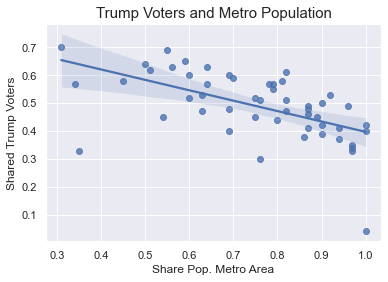

In [175]:
sns.regplot(x="share_population_in_metro_areas", y="share_voters_voted_trump", data=HC);
plt.xlabel("Share Pop. Metro Area")
plt.ylabel("Shared Trump Voters")
plt.title("Trump Voters and Metro Population",fontsize=15)

In [215]:
X = HC[['share_population_in_metro_areas']]
y = HC['hate_crimes_per_100k_splc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
m.fit(X_train,y_train) 
print(m.intercept_) # print the intercept

0.007046198140170712


In [216]:
coeff_df = pd.DataFrame(m.coef_,X.columns,columns=['Coefficient'])  # creating a DF off of these 
coeff_df  # relates to each features of our dataset 

,Coefficient
share_population_in_metro_areas,0.332223


In [217]:
pred4 = m.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.1730465658532989
MSE: 0.04955315705112517
RMSE: 0.22260538414675682


Text(0.5, 1.0, 'Predictive model')

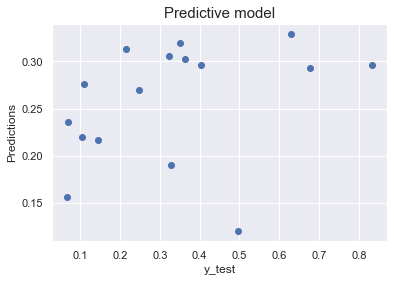

In [179]:
plt.scatter(y_test,pred4) 
plt.xlabel("y_test")
plt.ylabel("Predictions")
plt.title("Predictive model",fontsize=15)

Text(0.5, 1.0, 'Share Urban Pop and SPLC Reported Hate Crimes')

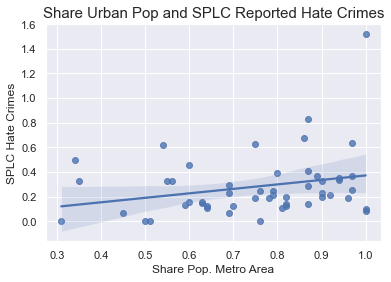

In [180]:
sns.regplot(x="share_population_in_metro_areas", y="hate_crimes_per_100k_splc", data=HC);
plt.xlabel("Share Pop. Metro Area")
plt.ylabel("SPLC Hate Crimes")
plt.title("Share Urban Pop and SPLC Reported Hate Crimes",fontsize=15)

The final varible model tested the theory that an increase in share of urban population would lead to an increase in reported SPLC hate crimes. The plot of Trump voters and urban population also shows that there is a linear relationship present that an increase in the urban population leads to a decrease in Trump Voters.  Given that we can verify that the demographics of Trump Voters are primarily white, we now can visualize that they are not urban.  This explains why in our original model we saw that an increase in Trump voters led to a decrease in reported SPLC hate crimes. It is not the case that voting for Trump leads to more equity in the community and less hate crimes but moreover that the population of Trump voters are typically not urban, white and correlates to less reported SPLC hate crimes. <br><hr>

- Holding all other features fixed, a 1 unit (100K) increase in **Share Urban Population** is associated with a **0.332223 unit increase** in SPLC reported Hate crimes.<br>

### Question 3:

- How does the number of hate crimes vary across states? Is there any similarity in number of hate incidents (per 100,000 people) between some states than in others — both according to the SPLC after the election and the FBI before it? 

In [218]:
X = HC[['hate_crimes_per_100k_splc','avg_hatecrimes_per_100k_fbi']]
y = HC['state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

alg = AgglomerativeClustering(3)
achat = alg.fit_predict(X)  # AC hat 

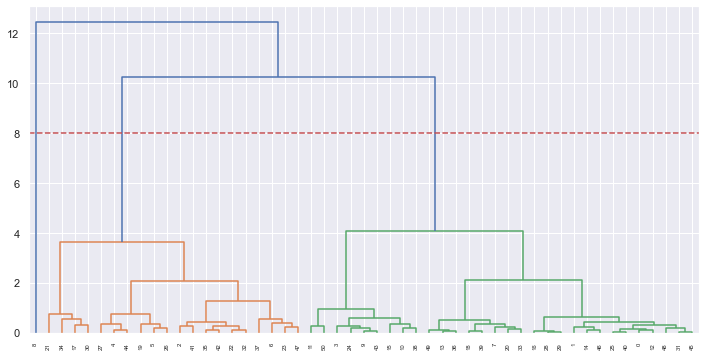

In [221]:
_ = sch.dendrogram((sch.linkage(X, method="ward"))) 
plt.axhline(y=8, color='r', linestyle='--')

In [225]:
pd.crosstab(achat, y)  

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
row_0,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,1,0,0,0,1,0,1,...,0,0,1,0,1,1,0,1,1,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,1,1,0,0,0,...,1,1,0,1,0,0,1,0,0,0


In [184]:
HC.groupby(achat)[['hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']].mean()

,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,0.194651,1.313869
1,1.522302,10.953480
2,0.346526,3.400555


In [185]:
clus1 = np.where(achat == 0)
clus2 = np.where(achat == 1)
clus3 = np.where(achat == 2) 

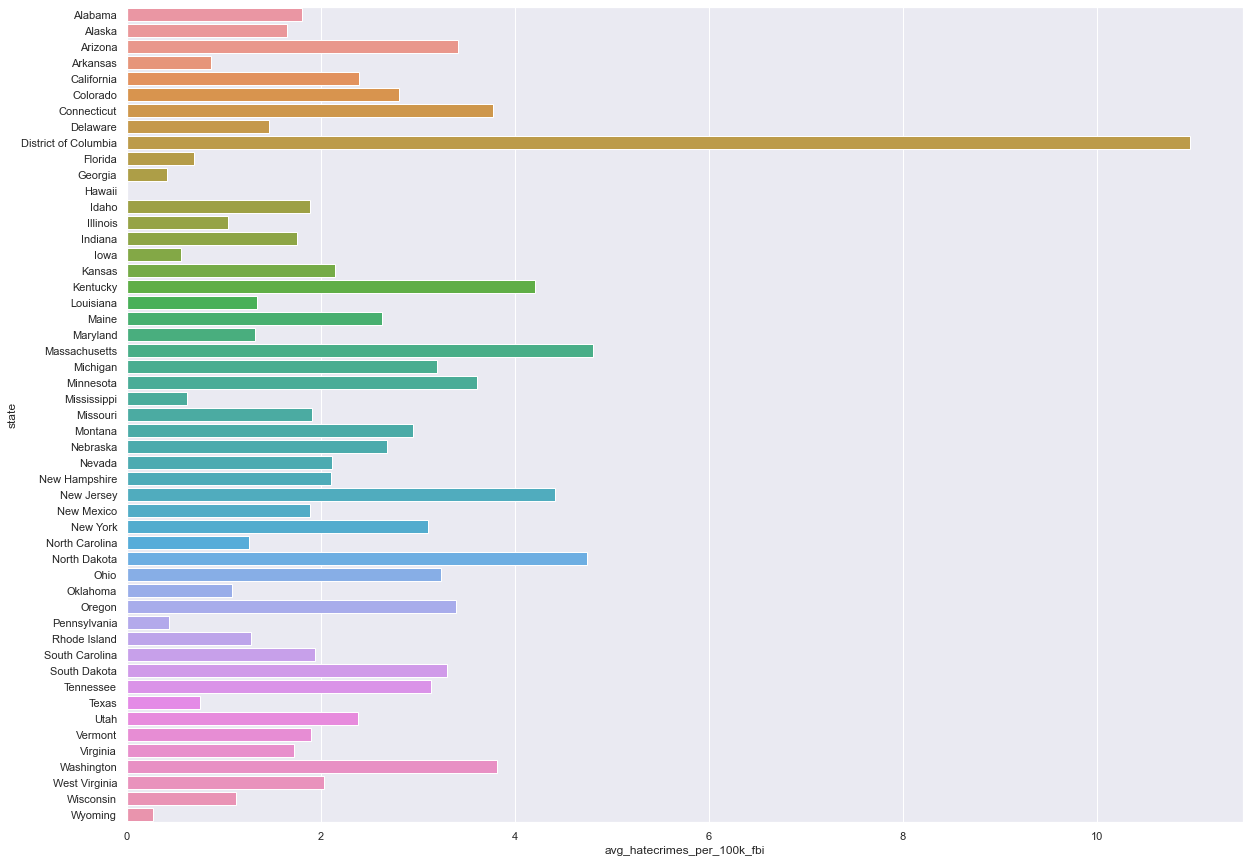

In [190]:
sns.barplot(x='avg_hatecrimes_per_100k_fbi',y='state',data=HC)
sns.set(rc={'figure.figsize':(20,15)})

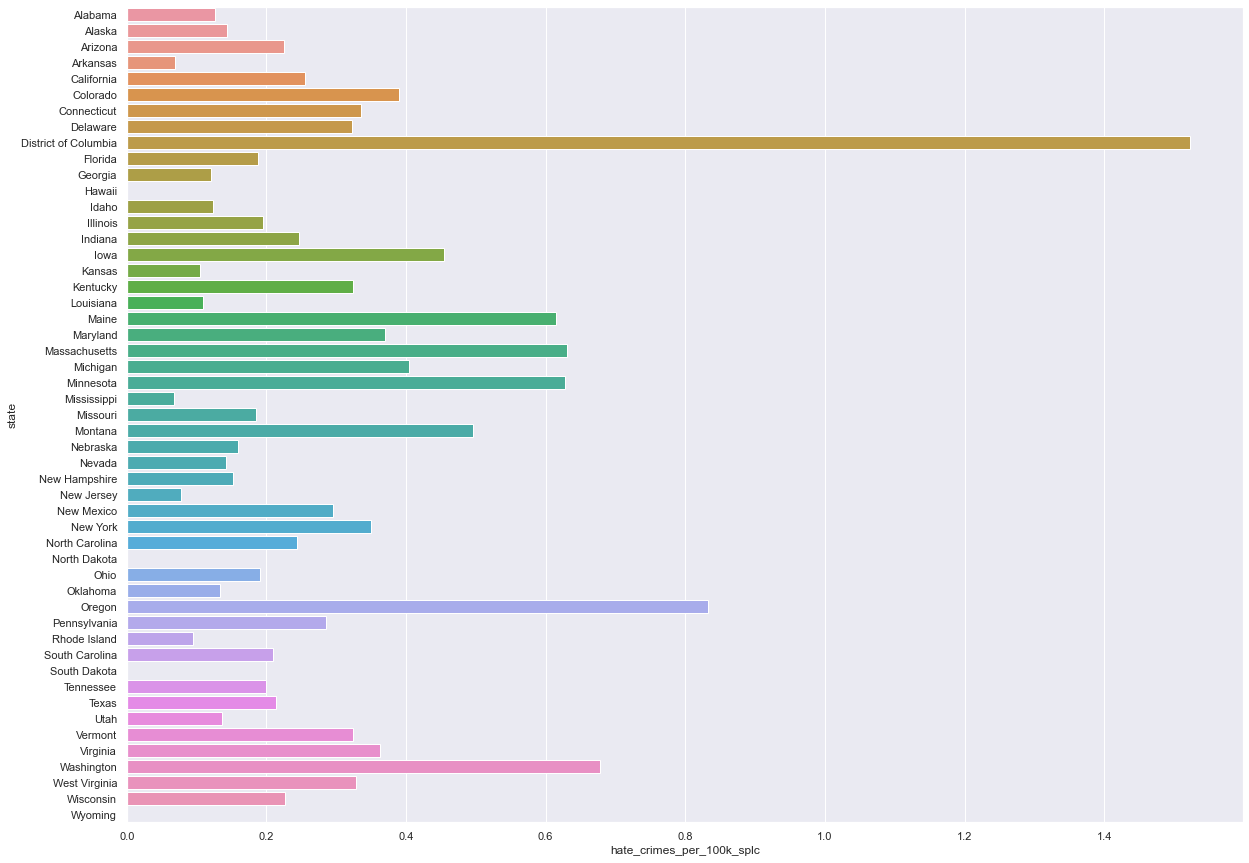

In [187]:
sns.barplot(x='hate_crimes_per_100k_splc',y='state',data=HC)
sns.set(rc={'figure.figsize':(20,15)})

<hr>
I ran the AgglomerativeClustering model on the data and based on my dendrogram, 3 clusters seems to be the best fit.  In reviewing the information within the clusters, the clustering by state does have a few noteworthy elements.  The most noteworthy item is that the District of Columbia is the only state included in Cluster 2(1). With this in mind, we can also see that per 100k reported hate crimes, the average rate was much larger than that of any of the other clusters in both the FBI reported hate crimes as well as the SPLC reported hate crimes. A visualization of the data also shows some distinct state-level items.  We again see that that the District of Columbia has an enormous amount of reported Hate Crimes both from the pre-2016 FBI data and in the post-2016 SPLC data.  We can visually see that in cluster 1(0) has the lowest level of reported hate crimes, cluster 3(2) has a larger instance of reported hate crimes, and cluster 2(1) is the District of Columbia which is very much an outlier overall. Washington and Oregon are both within cluster 3 with substantially more reported hate crimes post 2016. Given that both are regionally in the Pacific Northwest, it does suggest there may be a regional influence.
<hr>

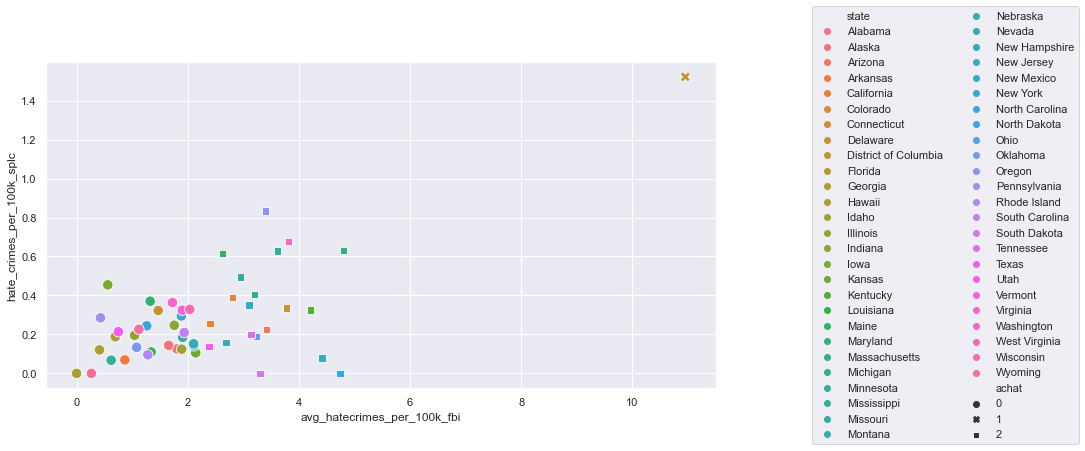

In [192]:
HC["achat"] = achat
_ = sns.scatterplot(x="avg_hatecrimes_per_100k_fbi", y="hate_crimes_per_100k_splc", 
                    hue="state", style="achat",
                    data=HC, s=110)  #removing the legend/enormous and doesn't add value
plt.rcParams["figure.figsize"] = (12,6)
_.legend(loc='right', bbox_to_anchor=(1.55, 0.5), ncol=2)